In [1]:
from pyforest import *
lazy_imports()
%matplotlib inline 
from scipy import stats
from sklearn.model_selection import KFold
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Concrete_Data.csv')
df.head()

<IPython.core.display.Javascript object>

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df=df.rename(columns={'Blast':'Slag','Fly Ash':'ash','Superplasticizer':'Superplastic','CA':'coarseagg',"FA":"fineagg","CMS":"strength"})

In [4]:
df.head()

,Cement,Slag,ash,Water,Superplastic,coarseagg,fineagg,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.dtypes

Cement          float64
Slag            float64
ash             float64
Water           float64
Superplastic    float64
coarseagg       float64
fineagg         float64
Age               int64
strength        float64
dtype: object

In [6]:
df.shape

(1030, 9)

<IPython.core.display.Javascript object>

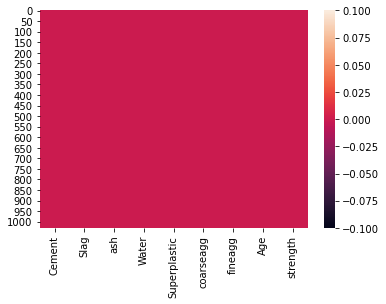

In [7]:
sns.heatmap(df.isnull())

<IPython.core.display.Javascript object>

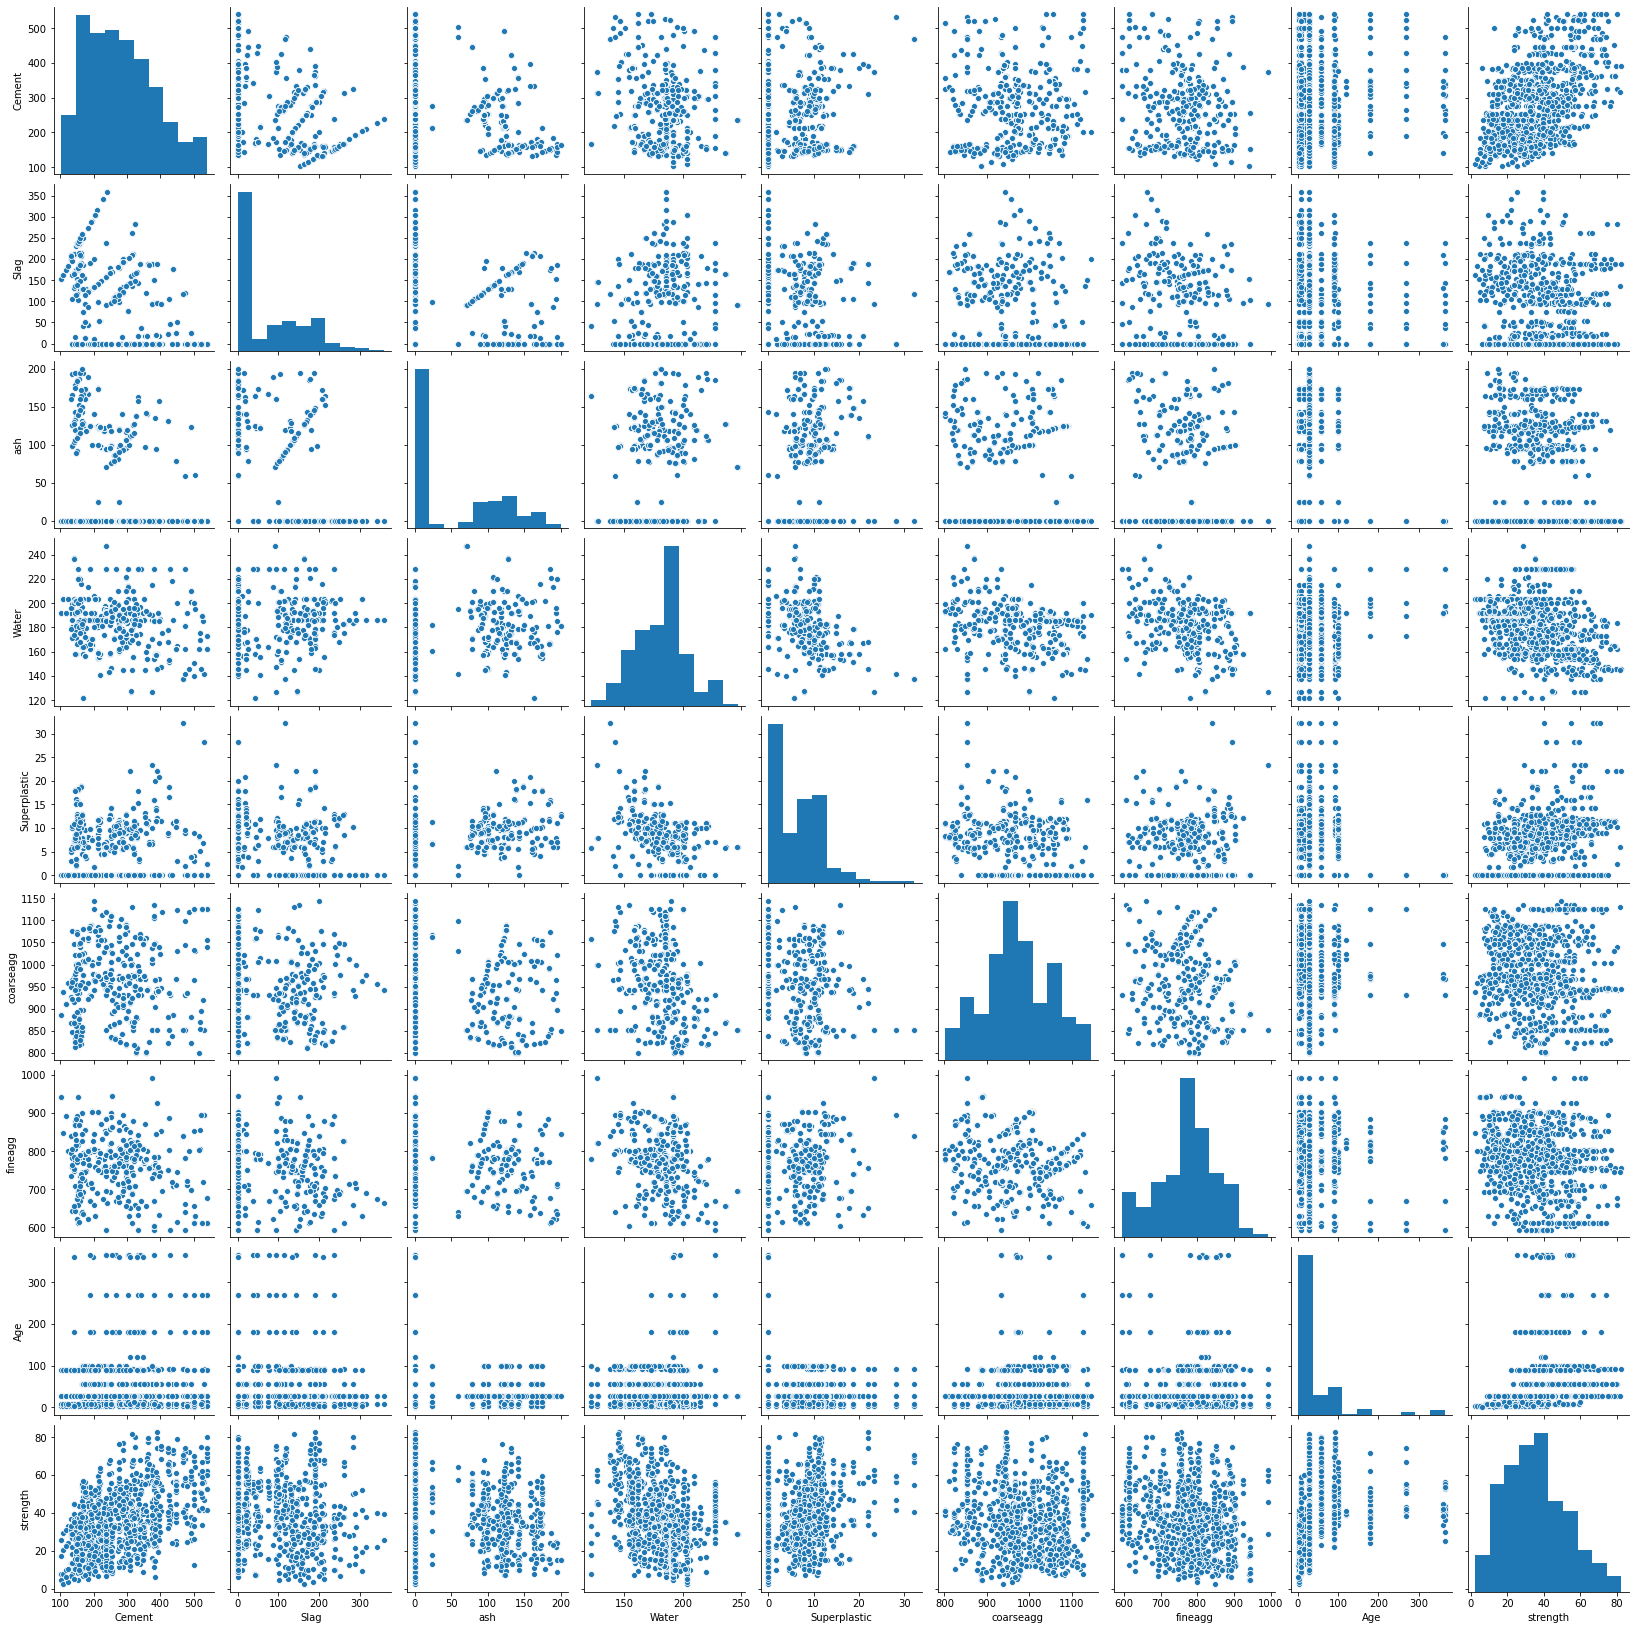

In [8]:
sns.pairplot(df)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# EDA

In [10]:
Q1=df['Cement'].quantile(q=0.25)
Q3=df['Cement'].quantile(q=0.75)
print("1st Quartile(Q1) is :",Q1)
print("3rd Quartile(Q3) is :",Q3)
print("inter Quartile Range (IQR) is ",stats.iqr(df['Cement']))

1st Quartile(Q1) is : 192.375
3rd Quartile(Q3) is : 350.0
inter Quartile Range (IQR) is  157.625


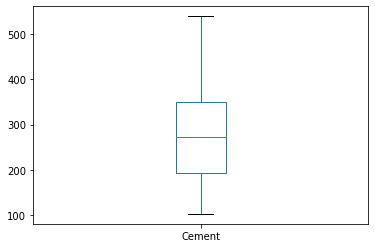

In [11]:
df['Cement'].plot.box()


In [12]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print("Lower outliers limit in cement",L_outliers)
print("upper outliers limit in cement",U_outliers)

Lower outliers limit in cement -44.0625
upper outliers limit in cement 586.4375


In [13]:
print("number of outliers in cement upper  :",df[df['Cement']>586.4375]['Cement'].count())
print("number of outlierts in cement lower  :",df[df['Cement']<-44.0625]["Cement"].count())

number of outliers in cement upper  : 0
number of outlierts in cement lower  : 0


In [14]:
print("% of outlier in cement upper>>> ",round(df[df['Cement']>586.4375]['Cement'].count()))
print("% of outlier in cement lower>>> ",round(df[df['Cement']<-44.0625]['Cement'].count()))

% of outlier in cement upper>>>  0
% of outlier in cement lower>>>  0


<IPython.core.display.Javascript object>

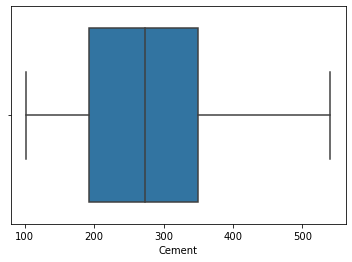

In [15]:
sns.boxplot(x="Cement",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'ASH')

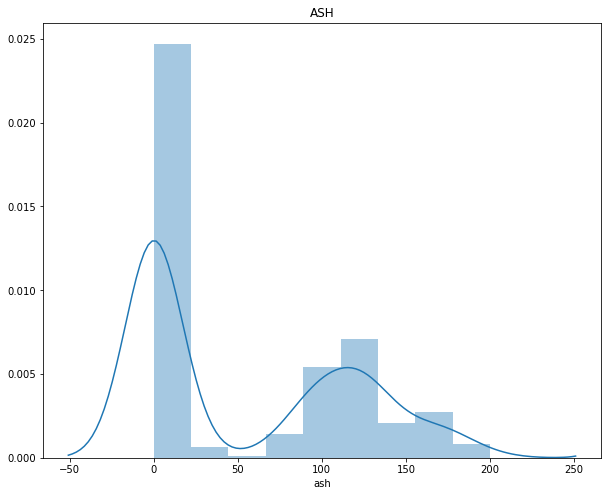

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title("ASH")

Water

In [17]:
w_Q1=df['Water'].quantile(q=0.25)
w_Q3=df['Water'].quantile(q=0.75)
print("1st Quartile(Q1) is :",w_Q1)
print("3rd Quartile(Q3) is :",w_Q3)
print("inter Quartile Range (IQR) is ",stats.iqr(df['Water']))

1st Quartile(Q1) is : 164.9
3rd Quartile(Q3) is : 192.0
inter Quartile Range (IQR) is  27.099999999999994


In [18]:
L_outliers=w_Q1-1.5*(w_Q3-w_Q1)
U_outliers=w_Q3+1.5*(w_Q3-w_Q1)
print("Lower outliers limit in cement",L_outliers)
print("upper outliers limit in cement",U_outliers)

Lower outliers limit in cement 124.25000000000001
upper outliers limit in cement 232.64999999999998


In [19]:
print("number of outliers in cement upper  :",df[df['Water']>232.64999999999998]['Water'].count())
print("number of outlierts in cement lower  :",df[df['Water']<124.25000000000001]['Water'].count())

number of outliers in cement upper  : 4
number of outlierts in cement lower  : 5


In [20]:
print("% of outlier in cement upper>>> ",round(df[df['Water']>232.64999999999998]['Water'].count()*100/len(df)),'%')
print("% of outlier in cement lower>>> ",round(df[df['Water']<124.25000000000001]['Water'].count()*100/len(df)),'%')

% of outlier in cement upper>>>  0.0 %
% of outlier in cement lower>>>  0.0 %


<IPython.core.display.Javascript object>

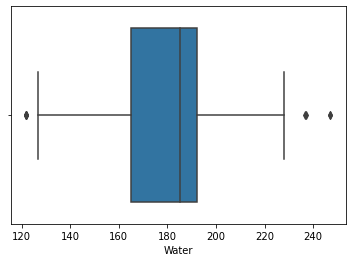

In [21]:
sns.boxplot(x='Water',data=df)

<IPython.core.display.Javascript object>

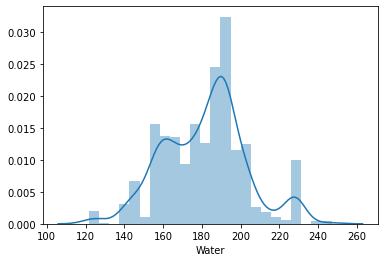

In [22]:
sns.distplot(df['Water']).set_titel=('Water')

# slag

In [23]:
s_Q1=df['Slag'].quantile(q=0.25)
s_Q3=df['Slag'].quantile(q=0.75)
print("1st Quartile(Q1) is :",s_Q1)
print("3rd Quartile(Q3) is :",s_Q3)
print("inter Quartile Range (IQR) is ",stats.iqr(df['Slag']))

1st Quartile(Q1) is : 0.0
3rd Quartile(Q3) is : 142.95
inter Quartile Range (IQR) is  142.95


In [24]:
L_outliers=s_Q1-1.5*(s_Q3-s_Q1)
U_outliers=s_Q3+1.5*(s_Q3-s_Q1)
print("Lower outliers limit in Slag ",L_outliers)
print("upper outliers limit in Slag",U_outliers)

Lower outliers limit in Slag  -214.42499999999998
upper outliers limit in Slag 357.375


In [25]:
print("number of outliers in cement upper  :",df[df['Slag']>357.375]['Slag'].count())
print("number of outlierts in cement lower  :",df[df['Slag']<-214.42499999999998]['Slag'].count())
print("% of outlier in cement upper>>> ",round(df[df['Slag']>357.375]['Slag'].count()*100/len(df)),'%')
print("% of outlier in cement lower>>> ",round(df[df['Slag']<-214.42499999999998]['Slag'].count()*100/len(df)),'%')

number of outliers in cement upper  : 2
number of outlierts in cement lower  : 0
% of outlier in cement upper>>>  0.0 %
% of outlier in cement lower>>>  0.0 %


<IPython.core.display.Javascript object>

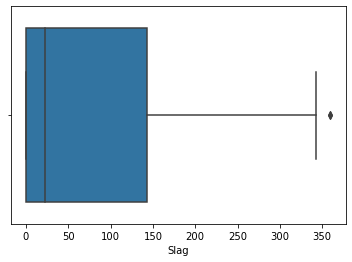

In [26]:
sns.boxplot(df['Slag'])


# Age

In [27]:
Q1=df['Age'].quantile(q=0.25)
Q3=df['Age'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
print(L_outliers)
print(Q1)
print(Q3)
print("inter Quartile Range (IQR) is ",stats.iqr(df['Age']))

-66.5
7.0
56.0
inter Quartile Range (IQR) is  49.0


In [28]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print("Lower outliers limit in cement",L_outliers)
print("upper outliers limit in cement",U_outliers)

Lower outliers limit in cement -66.5
upper outliers limit in cement 129.5


In [29]:
print("number of outliers in age upper  :",df[df['Age']>129.5]['Age'].count())
print("number of outlierts in age lower  :",df[df['Age']<-66.5]['Age'].count())
print("% of outlier in age upper>>> ",round(df[df['Age']>129.5]['Age'].count()*100/len(df)),'%')
print("% of outlier in age lower>>> ",round(df[df['Age']<-66.5]['Age'].count()*100/len(df)),'%')

number of outliers in age upper  : 59
number of outlierts in age lower  : 0
% of outlier in age upper>>>  6.0 %
% of outlier in age lower>>>  0.0 %


<IPython.core.display.Javascript object>

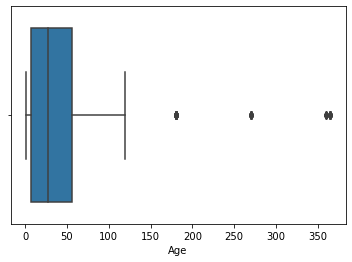

In [30]:
sns.boxplot(df['Age'])

In [31]:
Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
print(L_outliers)
print(Q1)
print(Q3)
print("inter Quartile Range (IQR) is ",stats.iqr(df['ash']))

-177.45
0.0
118.3
inter Quartile Range (IQR) is  118.3


In [32]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print("Lower outliers limit in Slag ",L_outliers)
print("upper outliers limit in Slag",U_outliers)

Lower outliers limit in Slag  -177.45
upper outliers limit in Slag 295.75


In [33]:
print("number of outliers in ash upper  :",df[df['ash']>295.75]['ash'].count())
print("number of outlierts in ash lower  :",df[df['ash']<-177.45]['ash'].count())
print("% of outlier in ash upper>>> ",round(df[df['ash']>295.75]['ash'].count()*100/len(df)),'%')
print("% of outlier in ash lower>>> ",round(df[df['ash']<-177.45]['ash'].count()*100/len(df)),'%')

number of outliers in ash upper  : 0
number of outlierts in ash lower  : 0
% of outlier in ash upper>>>  0.0 %
% of outlier in ash lower>>>  0.0 %


<IPython.core.display.Javascript object>

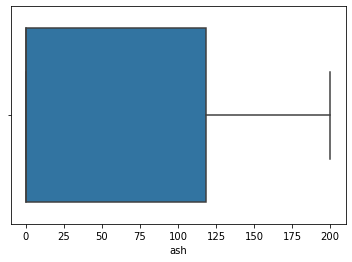

In [34]:
sns.boxplot(df['ash'])

# Multi Variate Anlysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

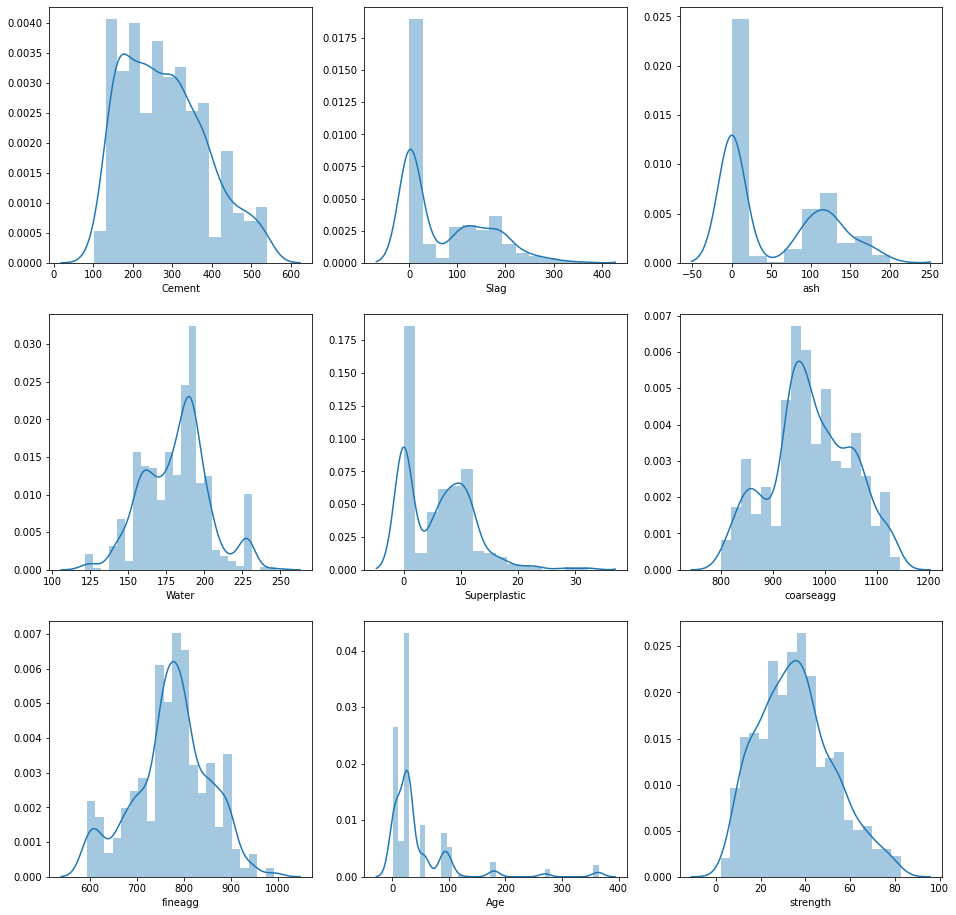

In [35]:
#distplot
fig,ax2=plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['Cement'],ax=ax2[0][0])
sns.distplot(df['Slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['Water'],ax=ax2[1][0])
sns.distplot(df['Superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['Age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2]) 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

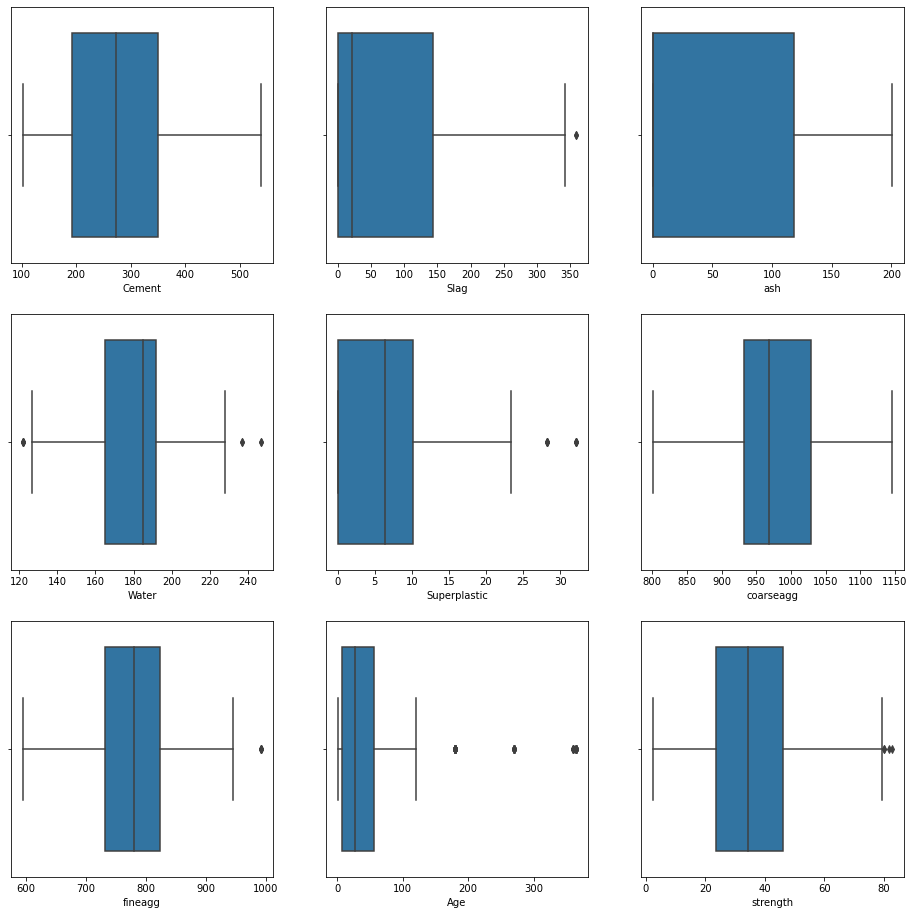

In [36]:
#distplot
fig,ax2=plt.subplots(3,3,figsize=(16,16))
sns.boxplot(df['Cement'],ax=ax2[0][0])
sns.boxplot(df['Slag'],ax=ax2[0][1])
sns.boxplot(df['ash'],ax=ax2[0][2])
sns.boxplot(df['Water'],ax=ax2[1][0])
sns.boxplot(df['Superplastic'],ax=ax2[1][1])
sns.boxplot(df['coarseagg'],ax=ax2[1][2])
sns.boxplot(df['fineagg'],ax=ax2[2][0])
sns.boxplot(df['Age'],ax=ax2[2][1])
sns.boxplot(df['strength'],ax=ax2[2][2]) 


<IPython.core.display.Javascript object>

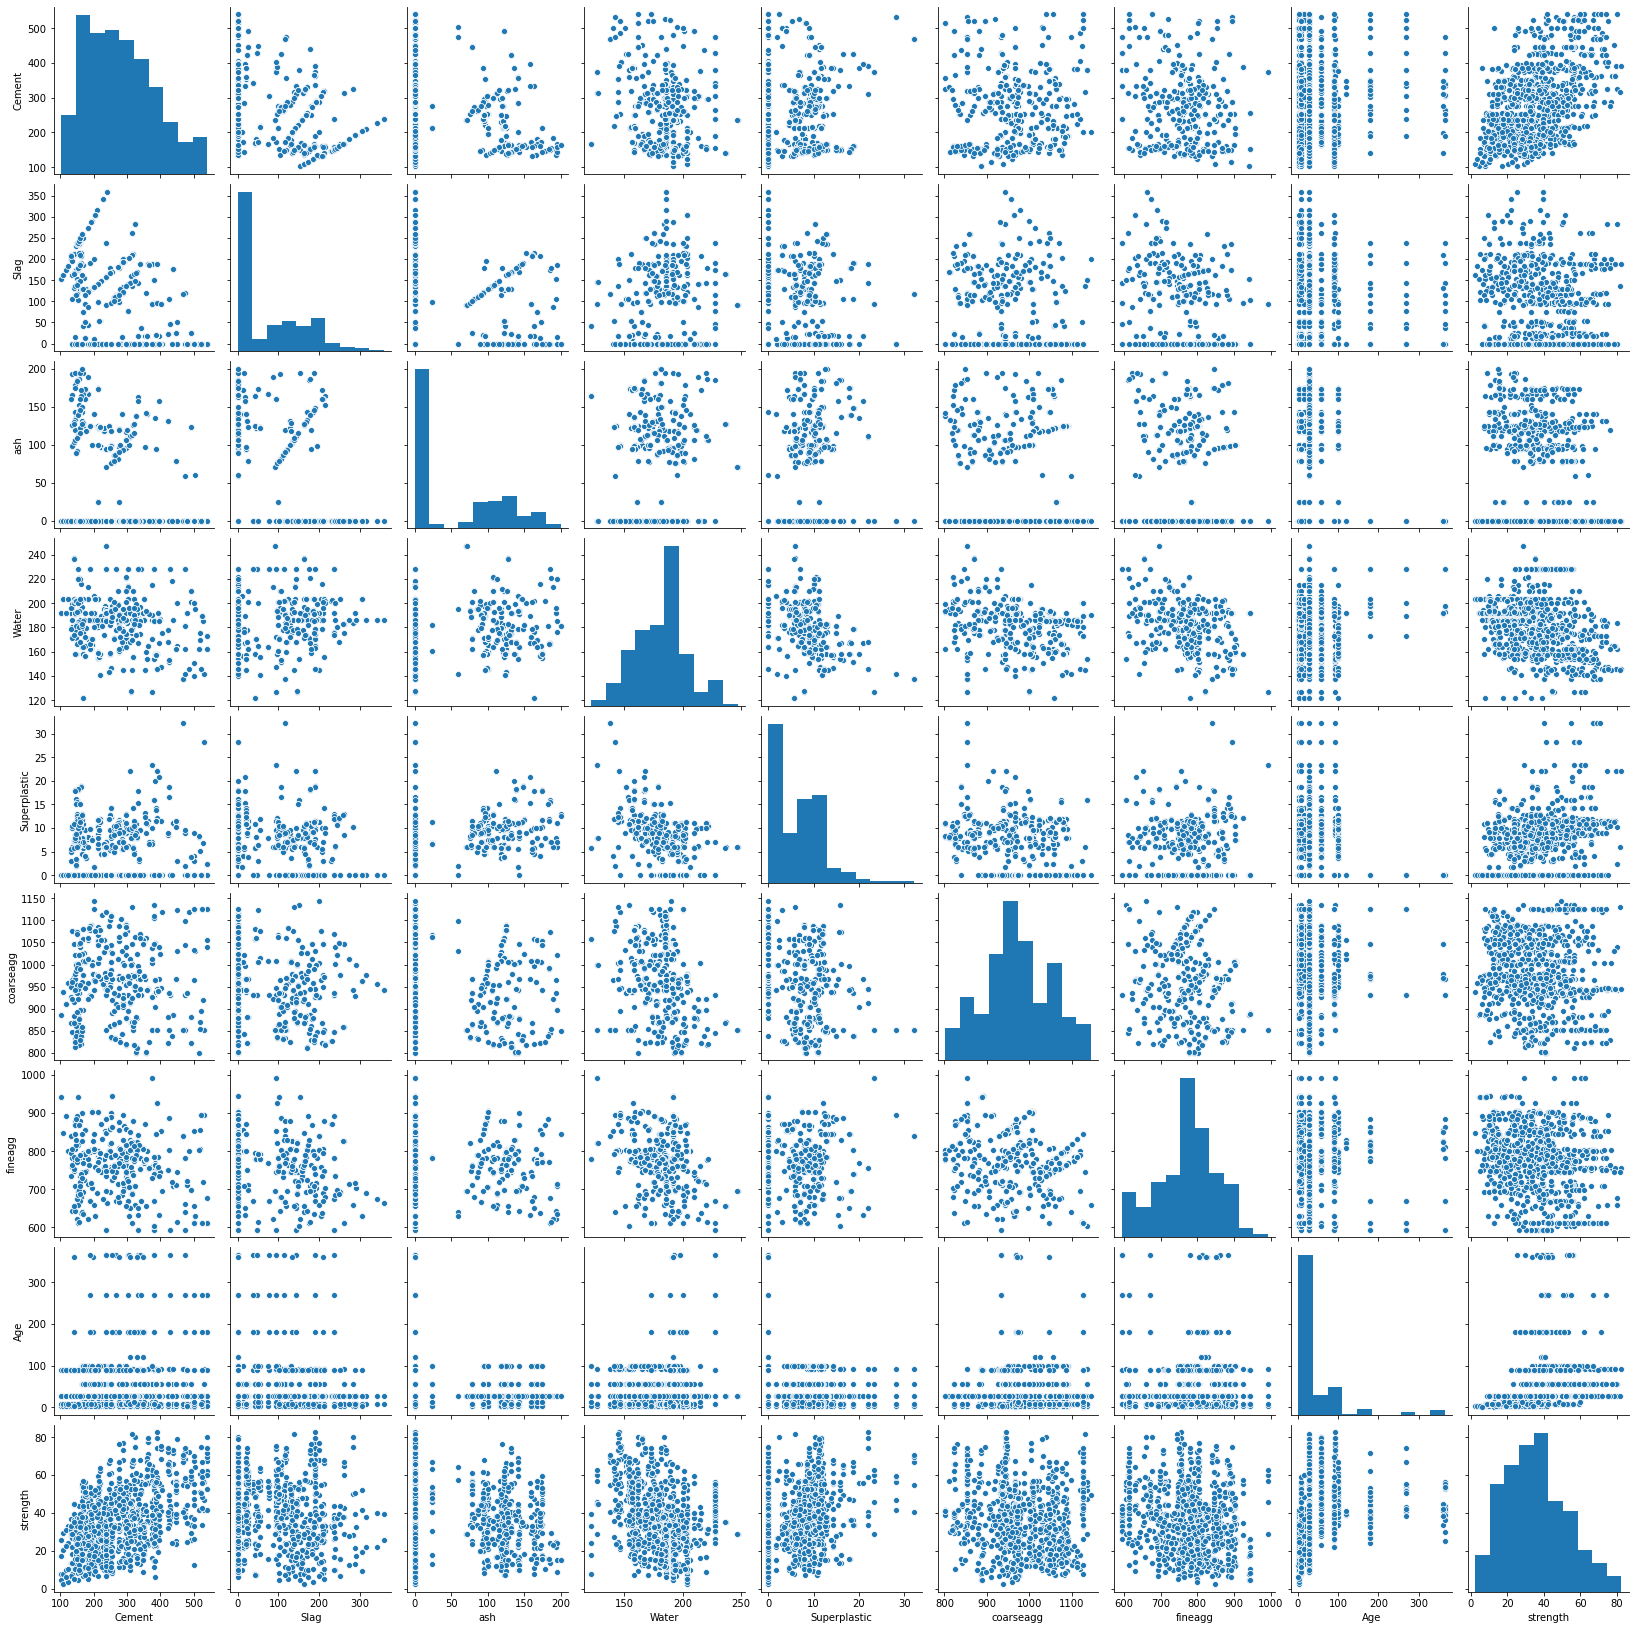

In [37]:
sns.pairplot(df)

# corrrelation between variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

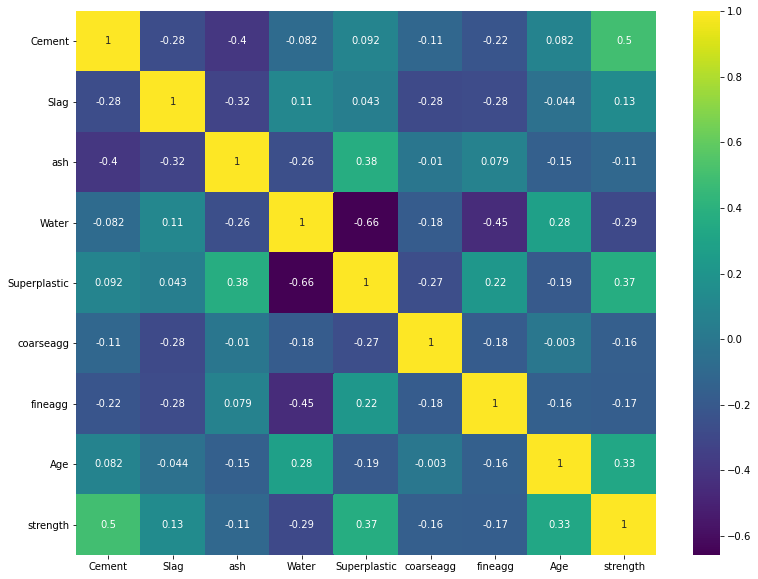

In [38]:
corr=df.corr()
plt.figure(figsize=(13,10))
sns.heatmap(corr,annot=True,cmap='viridis')

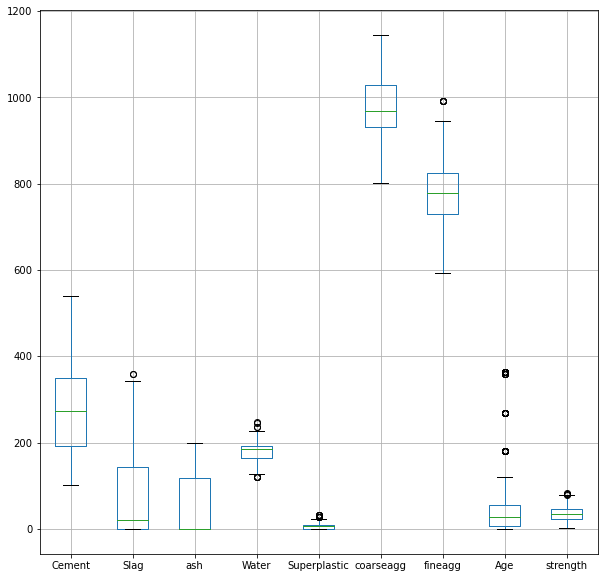

In [39]:
df.boxplot(figsize=(10,10))

# checking for outliers

In [40]:
print('Outliers in cement  ::>>>',df[((df.Cement-df.Cement.mean()/df.Cement.std()).abs()>3)]['Cement'].count())
print('Outliers in cement  ::>>>',df[((df.Slag-df.Slag.mean()/df.Slag.std()).abs()>3)]['Slag'].count())
print('Outliers in cement  ::>>>',df[((df.ash-df.ash.mean()/df.ash.std()).abs()>3)]['ash'].count())
print('Outliers in cement  ::>>>',df[((df.Water-df.Water.mean()/df.Water.std()).abs()>3)]['Water'].count())
print('Outliers in cement  ::>>>',df[((df.Superplastic-df.Superplastic.mean()/df.Superplastic.std()).abs()>3)]['Superplastic'].count())
print('Outliers in cement  ::>>>',df[((df.coarseagg-df.coarseagg.mean()/df.coarseagg.std()).abs()>3)]['coarseagg'].count())
print('Outliers in cement  ::>>>',df[((df.fineagg-df.fineagg.mean()/df.fineagg.std()).abs()>3)]['fineagg'].count())
print('Outliers in cement  ::>>>',df[((df.Age-df.Age.mean()/df.Age.std()).abs()>3)]['Age'].count())
print('Outliers in cement  ::>>>',df[((df.ash-df.strength.mean()/df.strength.std()).abs()>3)]['strength'].count())


Outliers in cement  ::>>> 1030
Outliers in cement  ::>>> 559
Outliers in cement  ::>>> 464
Outliers in cement  ::>>> 1030
Outliers in cement  ::>>> 618
Outliers in cement  ::>>> 1030
Outliers in cement  ::>>> 1030
Outliers in cement  ::>>> 894
Outliers in cement  ::>>> 464


In [41]:
#from scipy.stats import zscore
#z=np.abs(zscore(df['Cement']))
#print(z)


# replacing the outliers by median

In [42]:
for cols in df.columns[:-1]:
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    iqr=Q3-Q1
    
    low=Q1-1.5*iqr
    high=Q3+1.5*iqr
    df.loc[(df[cols]< low)|(df[cols] > high),cols]=df[cols].median()

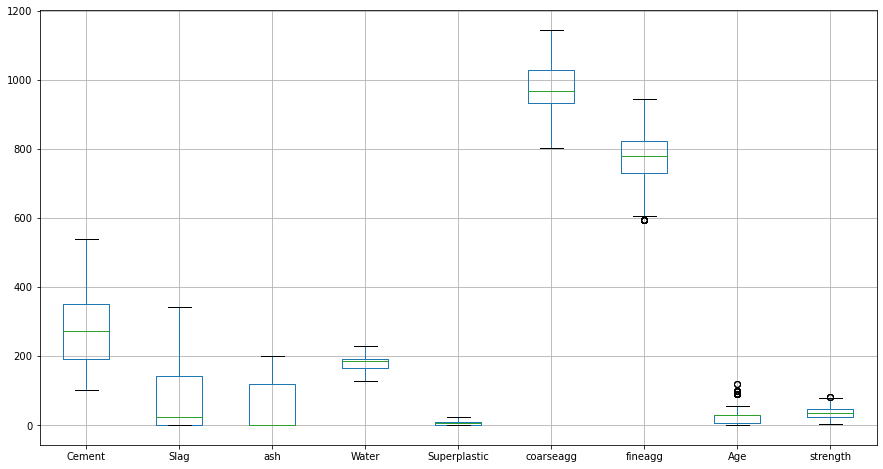

In [43]:
df.boxplot(figsize=(15,8))

# Feature Engineering and Model Building

In [44]:
df1=df
from scipy.stats import zscore 
z=zscore(df)
z=np.abs(z)
z

<IPython.core.display.Javascript object>

array([[2.47791487, 0.8581924 , 0.84714393, ..., 1.22730564, 0.15315867,
        2.64540763],
       [2.47791487, 0.8581924 , 0.84714393, ..., 1.22730564, 0.15315867,
        1.56142148],
       [0.49142531, 0.81154111, 0.84714393, ..., 2.26970038, 0.15315867,
        0.26662698],
       ...,
       [1.27008832, 0.77521708, 0.85063487, ..., 0.09475598, 0.15315867,
        0.72572939],
       [1.16860982, 1.32945143, 0.84714393, ..., 0.20789394, 0.15315867,
        0.18253855],
       [0.19403325, 0.31940913, 0.3769452 , ..., 0.14041845, 0.15315867,
        0.20469738]])

In [45]:
df_new=df1[(z<3).all(axis=1)]
df_new

,Cement,Slag,ash,Water,Superplastic,coarseagg,fineagg,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


In [46]:
df.shape

(1030, 9)

In [47]:
df1.shape

(1030, 9)

In [48]:
df_new.shape

(1020, 9)

In [49]:
df.head()

,Cement,Slag,ash,Water,Superplastic,coarseagg,fineagg,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,44.30


In [50]:
#spliting the data into dependant ans independant attributes
#independendent and Dependent variables
x=df.drop(['strength'],axis=1)
y=df['strength']

In [51]:
x.head()

,Cement,Slag,ash,Water,Superplastic,coarseagg,fineagg,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0


In [52]:
xsclad=x.apply(zscore)
xsclad_df=pd.DataFrame(xsclad,columns=df.columns)
xsclad_df

<IPython.core.display.Javascript object>

,Cement,Slag,ash,Water,Superplastic,coarseagg,fineagg,Age,strength
0,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,0.863154,-1.227306,-0.153159,NaN
1,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,1.056164,-1.227306,-0.153159,NaN
2,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159,NaN
3,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159,NaN
4,-0.790459,0.693195,-0.847144,0.502442,-1.091166,0.070527,0.673158,-0.153159,NaN
...,...,...,...,...,...,...,...,...,...
1025,-0.045645,0.501029,0.564545,-0.099698,0.534552,-1.323005,-0.053976,-0.153159,NaN
1026,0.392819,-0.858192,0.960068,0.696681,0.808549,-1.994680,0.519341,-0.153159,NaN
1027,-1.270088,0.775217,0.850635,0.536434,0.023090,-1.036064,0.094756,-0.153159,NaN
1028,-1.168610,1.329451,-0.847144,-0.293937,0.972948,0.214641,0.207894,-0.153159,NaN


In [53]:
x_train,x_test,y_train,y_test=train_test_split(xsclad,y,test_size=0.30,random_state=3)

<IPython.core.display.Javascript object>

# Building Deffernt Models

Random Forest

In [54]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [55]:
y_pred=model.predict(x_test)
y_pred

array([17.9259    , 43.1759    , 46.557     , 34.56630333, 78.61815   ,
       50.611     , 11.0778    , 19.1047    , 67.98043333, 11.6274    ,
       34.25208333, 14.5376    , 17.7733    , 29.8077    , 59.54353333,
       38.00516667, 43.741     , 49.7571    , 49.38807333, 14.2204    ,
       13.802     , 49.9775    , 49.35143333, 40.98923333, 21.3882    ,
       64.83415   , 26.88206381, 10.6602    ,  7.4967    , 34.11673333,
       27.4382    , 49.88080333, 30.19026667, 26.55392333, 18.2418    ,
       18.3253    , 25.68323333, 17.4141    , 16.8974    , 12.3619    ,
       23.1697    , 47.3796    , 35.3689    , 34.9078    , 50.7098    ,
       45.5619    , 23.74268   , 34.9089    , 44.5693    , 68.2324    ,
       38.74093667, 15.8273    , 37.2687381 , 33.8852    , 51.4876    ,
       26.7754    , 31.48872333, 16.5035    , 30.7292    , 53.04364667,
       35.62995   , 28.0865    , 17.638     , 39.9299    , 34.25208333,
       11.7821    , 52.23518667, 36.74276667, 13.9397    , 33.54

In [56]:
#Model Performance on training data
model.score(x_train,y_train)

0.9805405321090188

In [57]:
model.score(x_test,y_test)

0.9173544282299382

In [58]:
from sklearn import metrics
acc_R=metrics.r2_score(y_test,y_pred)
acc_R

0.9173544282299382

In [59]:
metrics.mean_squared_error(y_test,y_pred)

24.781106364917065

In [60]:
#store the accuracy results for each model in dataframe for final comparision
reslt_1=pd.DataFrame({'Algorithm':['Random forest'],'accuracy':acc_R},index={'1'})
reslt_1

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.917354


# KFold cross validation

In [61]:
from sklearn.model_selection import cross_val_score
k=20
kfold=KFold(n_splits=k,random_state=70)
k_results=cross_val_score(model,x,y,cv=kfold)
accuracy=np.mean(abs(k_results))
accuracy

<IPython.core.display.Javascript object>

0.7590260332623044

In [62]:
k_results

array([0.58595512, 0.81075023, 0.39637027, 0.95985773, 0.7589825 ,
       0.84223256, 0.63969046, 0.68502529, 0.42643257, 0.5217066 ,
       0.77059713, 0.65501385, 0.87971912, 0.85876603, 0.8588142 ,
       0.85540273, 0.91212845, 0.9445202 , 0.8708716 , 0.94768404])

#store the accuracy result of each model in a dataframe for final comparission
random_re=pd.DataFrame({'algorithm':['Random Forest Regressor k_fold'],'accuracy':[accuracy]},index={'2'})
resultn=pd.concat([results,random_re])
resultn=results[['algorithm','accuracy']]
resultn

# Gradient Booosting Regressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
model=GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [65]:
y_pred=model.predict(x_test)
y_pred

array([19.18371176, 42.17476856, 46.21014213, 34.097445  , 76.95829359,
       45.69484618,  8.37997634, 17.24820984, 62.50946456,  9.86860404,
       33.93401706, 13.26709909, 21.66698418, 34.45957422, 60.73410186,
       38.95297337, 41.47196775, 50.41885436, 47.23469629, 14.29416668,
       13.79603746, 46.90737299, 49.99038144, 37.85986593, 22.40731167,
       57.54245981, 30.20075029, 10.22651887, 10.02341239, 36.41185247,
       28.35371769, 47.43865116, 27.92071031, 29.93239616, 18.16857901,
       22.95319463, 28.64895575, 17.25346584, 16.33890926, 14.32577655,
       20.44640379, 54.55044085, 38.76357443, 33.71083408, 49.75507432,
       43.54139663, 28.99169785, 34.49548669, 45.83545569, 71.24547894,
       42.221212  , 17.21365332, 37.66093553, 33.29240294, 50.2156415 ,
       28.29005093, 31.80042003, 16.28296118, 31.82257402, 49.06890147,
       35.27321902, 27.72703603, 17.80352853, 40.73533868, 33.93401706,
        8.9978315 , 53.32895746, 37.97602311, 13.33066215, 32.68

In [66]:
model.score(x_train,y_train)

0.942972327678848

In [67]:
acc_g=metrics.r2_score(y_test,y_test)

In [68]:
acc_g

1.0

In [69]:
model.score(x_test,y_test)

0.9104114223512441

In [70]:
#store the accuracy results for each model in dataframe for final comparision
reslut_1=pd.DataFrame({'Algorithm':['Random forest'],'accuracy':[acc_R]},index={'1'})
reslut_1

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.917354


In [71]:
results=reslut_1[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random forest,0.917354


In [72]:
random_re=pd.DataFrame({'Algorithm':['Random Forest Regressor k_fold'],'accuracy':[accuracy]},index={'2'})
results=pd.concat([results,random_re])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.917354
2,Random Forest Regressor k_fold,0.759026


In [73]:
metrics.mean_squared_error(y_test,y_pred)

26.862952536310978

In [74]:
#store the accuracy results for each model in dataframe for final comparision
grd_re=pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'],'accuracy':[accuracy]},index={'3'})
results=pd.concat([results,grd_re])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.917354
2,Random Forest Regressor k_fold,0.759026
3,Gradient Boosting Regressor,0.759026


In [75]:
from sklearn import metrics
acc_R=metrics.r2_score(y_test,y_pred)
acc_g

1.0


# KFold Cross  Validation

In [76]:
# k=20
kfold=KFold(n_splits=k,random_state=110)
result_3=cross_val_score(model,x,y,cv=kfold)
accuracy=np.mean(abs(result_3))
accuracy

<IPython.core.display.Javascript object>

0.7696886042347275

In [77]:
grd_k=pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'],'accuracy':[accuracy]},index={'4'})
results=pd.concat([results,grd_k])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.917354
2,Random Forest Regressor k_fold,0.759026
3,Gradient Boosting Regressor,0.759026
4,Gradient Boosting Regressor,0.769689


# Ada boosting Regressor

In [78]:
from sklearn.ensemble import AdaBoostRegressor

In [79]:
model=AdaBoostRegressor()
model.fit(x_train,y_train)

AdaBoostRegressor()

In [80]:
y_pred=model.predict(x_test)
y_pred

array([25.33251908, 44.77292929, 41.07963303, 34.07193548, 68.82627027,
       47.50868056, 17.78347458, 25.80643836, 56.57646465, 17.44      ,
       40.01009756, 19.77092486, 19.22      , 38.74253521, 61.1572973 ,
       45.56462366, 44.47978378, 45.74076923, 49.36614213, 22.1559009 ,
       22.1559009 , 40.48041667, 51.05738832, 45.56462366, 24.42326087,
       57.67818182, 35.32225627, 16.17447154, 12.52137931, 38.295625  ,
       30.05904523, 44.52326923, 29.89168539, 32.25313131, 19.22      ,
       29.88462185, 34.72012945, 22.53210526, 17.78347458, 21.71275   ,
       26.59958084, 43.92777778, 44.47978378, 34.72012945, 41.66130769,
       46.68771242, 34.72012945, 39.01128788, 41.89641975, 60.04227273,
       39.53062827, 22.30714286, 45.56462366, 34.72012945, 40.48041667,
       29.89168539, 38.74253521, 22.74897959, 39.01128788, 46.68771242,
       36.35228296, 35.65741818, 26.66600707, 47.50868056, 40.01009756,
       17.6075    , 45.72298643, 45.56462366, 17.25428571, 36.30

In [81]:
model.score(x_train,y_train)

0.8161512645026259

In [82]:
aa_ada=metrics.r2_score(y_test,y_pred)
aa_ada

0.7681891353149546

In [83]:
model.score(x_test,y_test)

0.7681891353149546

In [84]:
metrics.mean_squared_error(y_test,y_pred)

69.5080156295132

In [85]:
acc_ada=pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'],'accuracy':[accuracy]},index={'5'})
results=pd.concat([results,acc_ada])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.917354
2,Random Forest Regressor k_fold,0.759026
3,Gradient Boosting Regressor,0.759026
4,Gradient Boosting Regressor,0.769689
5,Gradient Boosting Regressor,0.769689


In [86]:
# KFold Cross  Validation
# k=20
kfold=KFold(n_splits=k,random_state=110)
result_4=cross_val_score(model,x,y,cv=kfold)
accuracy=np.mean(abs(result_4))
accuracy

<IPython.core.display.Javascript object>

0.584798075730504

In [87]:
acc_adac=pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'],'accuracy':[accuracy]},index={'6'})
results=pd.concat([results,acc_adac])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.917354
2,Random Forest Regressor k_fold,0.759026
3,Gradient Boosting Regressor,0.759026
4,Gradient Boosting Regressor,0.769689
5,Gradient Boosting Regressor,0.769689
6,Gradient Boosting Regressor,0.584798


In [88]:
#Algorithm	accuracy
#	Random forest	0.914117
#	Random Forest Regressor k_fold	0.759055
#	Gradient Boosting Regressor	0.759055
#	Gradient Boosting Regressor k_fold	0.771037
##	Gradient Boosting Regressor	0.770836
#	Gradient Boosting Regresso k_fold0.585894

# KNN Regressor

In [89]:
# checking differrnt values of neighbor to determine
from sklearn.neighbors import KNeighborsRegressor
diff_k=[]
for  i in range(1,45):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    diff_k.append(np.mean(pred_i!=y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean error')

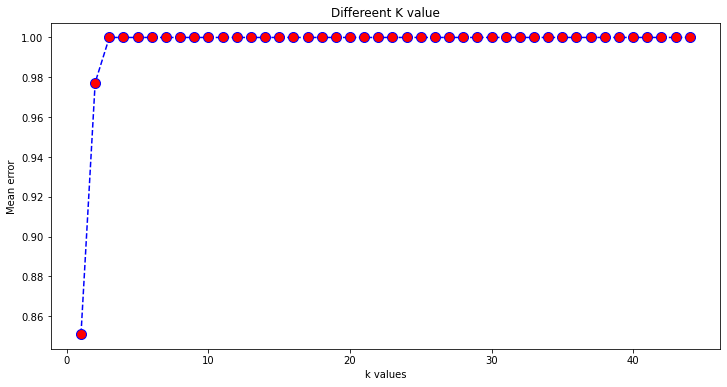

In [90]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Differeent K value')
plt.xlabel('k values')
plt.ylabel('Mean error')

In [91]:
#k=3 is a better choice from the above plot
model=KNeighborsRegressor(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [92]:
y_pred=model.predict(x_test)

In [93]:
y_pred

array([16.26333333, 50.31      , 42.87      , 23.75      , 74.5       ,
       36.65666667, 12.10666667, 13.59666667, 58.86666667, 20.23      ,
       32.91666667, 13.57      , 22.33      , 50.07333333, 62.06666667,
       38.43666667, 43.89      , 46.65333333, 34.28666667, 16.33      ,
       13.11666667, 45.39333333, 37.78      , 32.95      , 20.87333333,
       53.13333333, 26.75      ,  8.82666667,  8.02      , 38.03333333,
       21.14333333, 49.34666667, 24.67      , 24.26666667, 18.24      ,
       15.35      , 24.26666667, 18.30333333, 14.94      , 13.48      ,
       23.98333333, 49.46666667, 35.82      , 29.02333333, 47.83333333,
       50.31      , 22.46333333, 39.76666667, 43.77333333, 70.26333333,
       27.18333333, 15.79666667, 34.25666667, 31.14666667, 45.39333333,
       27.21333333, 33.22666667, 19.01      , 31.91333333, 54.18      ,
       31.66666667, 22.33      , 12.90333333, 38.06333333, 32.91666667,
       12.10666667, 56.81333333, 38.89666667, 18.40666667, 25.75

In [94]:
model.score(x_train,y_train)

0.8964697386842049

In [95]:
acc_knn=metrics.r2_score(y_test,y_pred)
acc_knn

0.7999309209382655

In [96]:
metrics.mean_squared_error(y_test,y_pred)

59.990305861201

In [97]:
knn_df=pd.DataFrame({'Algorithm':['KNN Regressor'],'accuracy':[acc_knn]},index={'8'})
results=pd.concat([results,knn_df])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.917354
2,Random Forest Regressor k_fold,0.759026
3,Gradient Boosting Regressor,0.759026
4,Gradient Boosting Regressor,0.769689
5,Gradient Boosting Regressor,0.769689
6,Gradient Boosting Regressor,0.584798
8,KNN Regressor,0.799931


# KFold validation

In [98]:
# KFold Cross  Validation
k=20
kfold=KFold(n_splits=k,random_state=70)
result_5=cross_val_score(model,x,y,cv=kfold)
accuracy=np.mean(abs(result_5))
accuracy

<IPython.core.display.Javascript object>

0.6907106255855276

In [99]:
knn_df_kfold=pd.DataFrame({'Algorithm':['KNN Regressor KFold'],'accuracy':[accuracy]},index={'9'})
results=pd.concat([results,knn_df_kfold])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.917354
2,Random Forest Regressor k_fold,0.759026
3,Gradient Boosting Regressor,0.759026
4,Gradient Boosting Regressor,0.769689
5,Gradient Boosting Regressor,0.769689
6,Gradient Boosting Regressor,0.584798
8,KNN Regressor,0.799931
9,KNN Regressor KFold,0.690711


# bagging Regressor

In [100]:
from sklearn.ensemble import BaggingRegressor

In [101]:
model= BaggingRegressor()
model.fit(x_train,y_train)

BaggingRegressor()

In [102]:
y_pred=model.predict(x_test)

In [103]:
model.score(x_train,y_train)

0.9731221899668356

In [104]:
model.score(x_test,y_test)

0.9034503419184781

In [105]:
acc_br=metrics.r2_score(y_test,y_pred)
acc_br

0.9034503419184781

In [106]:
metrics.mean_squared_error(y_test,y_pred)

28.950218325929562

In [107]:
bagging_df=pd.DataFrame({'Algorithm':["Bagning Regressor"],'accuracy':[acc_br]},index={'10'})
results=pd.concat([results,bagging_df])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.917354
2,Random Forest Regressor k_fold,0.759026
3,Gradient Boosting Regressor,0.759026
4,Gradient Boosting Regressor,0.769689
5,Gradient Boosting Regressor,0.769689
6,Gradient Boosting Regressor,0.584798
8,KNN Regressor,0.799931
9,KNN Regressor KFold,0.690711
10,Bagning Regressor,0.903450



# KFold cross value

In [108]:
from sklearn.model_selection import cross_val_score
k=20
kfold=KFold(n_splits=k,random_state=70)
results_6=cross_val_score(model,x,y,cv=kfold)
accuracy=np.mean(abs(results_6))
accuracy

<IPython.core.display.Javascript object>

0.7372398262478905

In [109]:
bagging_kfold=pd.DataFrame({'Algorithm':["Bagning Regressor kfold"],'accuracy':[accuracy]},index={'11'})
results=pd.concat([results,bagging_kfold])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.917354
2,Random Forest Regressor k_fold,0.759026
3,Gradient Boosting Regressor,0.759026
4,Gradient Boosting Regressor,0.769689
5,Gradient Boosting Regressor,0.769689
6,Gradient Boosting Regressor,0.584798
8,KNN Regressor,0.799931
9,KNN Regressor KFold,0.690711
10,Bagning Regressor,0.903450
11,Bagning Regressor kfold,0.737240


# Support Vector Regressor

In [110]:
from sklearn.svm import SVR
model=SVR(kernel='linear')
model.fit(x_train,y_train)

SVR(kernel='linear')

In [111]:
y_pred=model.predict(x_test)

In [112]:
model.score(x_train,y_train)

0.7207278986999097

In [113]:
model.score(x_test,y_test)

0.6956043809949461

In [114]:
acc_svr=metrics.r2_score(y_test,y_pred)
acc_svr

0.6956043809949461

In [115]:
metrics.mean_squared_error(y_test,y_pred)

91.27240637364123

In [116]:
svr_df=pd.DataFrame({'Algorithm':["SVR(kernel='linear')"],'accuracy':[acc_svr]},index={'12'})
results=pd.concat([results,svr_df])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random forest,0.917354
2,Random Forest Regressor k_fold,0.759026
3,Gradient Boosting Regressor,0.759026
4,Gradient Boosting Regressor,0.769689
5,Gradient Boosting Regressor,0.769689
6,Gradient Boosting Regressor,0.584798
8,KNN Regressor,0.799931
9,KNN Regressor KFold,0.690711
10,Bagning Regressor,0.903450
11,Bagning Regressor kfold,0.737240


***kfold validation for SVR***

# XGBooster Regressor

In [117]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr=XGBRegressor()

In [118]:
xgr.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
y_pred=xgr.predict(x_test)

In [120]:
xgr.score(x_train,y_train)

0.992118236792539

In [121]:
xgr.score(x_test,y_test)

0.918817979053819

In [122]:
acc_xgb=metrics.r2_score(y_test,y_pred)
acc_xgb

0.918817979053819

In [123]:
metrics.mean_squared_error(y_test,y_pred)

24.34226363129838

In [124]:
xgb_df=pd.DataFrame({'algorithm':['XGBOOST'],'accuracy':[acc_xgb]},index={'13'})
results=pd.concat([results,xgb_df])
results=results[['algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,algorithm,accuracy
1,NaN,0.917354
2,NaN,0.759026
3,NaN,0.759026
4,NaN,0.769689
5,NaN,0.769689
6,NaN,0.584798
8,NaN,0.799931
9,NaN,0.690711
10,NaN,0.903450
11,NaN,0.737240


# Descission Tree regression

In [125]:
from sklearn.tree import DecisionTreeRegressor
dct_model=DecisionTreeRegressor()
dct_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [126]:
#😁#printing the feature importance
print('Feature Importance :  \n',pd.DataFrame(dct_model.feature_importances_,columns=['Importance'],index=x_train.columns))

<IPython.core.display.Javascript object>

Feature Importance :  
               Importance
Cement          0.382735
Slag            0.095769
ash             0.011595
Water           0.118702
Superplastic    0.033656
coarseagg       0.017509
fineagg         0.031104
Age             0.308931


In [127]:
y_pred=dct_model.predict(x_test)

In [128]:
dct_model.score(x_train,y_train)

0.992828160716336

In [129]:
dct_model.score(x_test,y_test)

0.8743257814302695

In [130]:
metrics.mean_squared_error(y_test,y_pred)

37.68315846817692

In [131]:
acc_dct=metrics.r2_score(y_test,y_pred)
acc_dct

0.8743257814302695

In [132]:
dct_df=pd.DataFrame({'algorithm':['Decision tree regression'],'accuracy':[acc_dct]},index={'14'})
results=pd.concat([results,dct_df])
results=results[['algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,algorithm,accuracy
1,NaN,0.917354
2,NaN,0.759026
3,NaN,0.759026
4,NaN,0.769689
5,NaN,0.769689
6,NaN,0.584798
8,NaN,0.799931
9,NaN,0.690711
10,NaN,0.903450
11,NaN,0.737240


In [133]:
k=18
kfold=KFold(n_splits=k,random_state=70)
results_7=cross_val_score(dct_model,x,y,cv=kfold)
accuracy=np.mean(abs(results_7))
accuracy

<IPython.core.display.Javascript object>

0.8037868134707882

In [134]:
dct_dfk=pd.DataFrame({'algorithm':['Decision tree regression k_fold'],'accuracy':[accuracy]},index={'15'})
results=pd.concat([results,dct_dfk])
results=results[['algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,algorithm,accuracy
1,NaN,0.917354
2,NaN,0.759026
3,NaN,0.759026
4,NaN,0.769689
5,NaN,0.769689
6,NaN,0.584798
8,NaN,0.799931
9,NaN,0.690711
10,NaN,0.903450
11,NaN,0.737240


In [135]:
df2=df.copy()

In [136]:
df2.head()

,Cement,Slag,ash,Water,Superplastic,coarseagg,fineagg,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,44.30


In [137]:
x=df2.drop(['strength','ash','coarseagg','fineagg'],axis=1)
y=df2['strength']

In [138]:
#split x and y into training and test in 70:30 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

<IPython.core.display.Javascript object>

In [139]:
x_train=x_train.apply(zscore)
x_test=x_test.apply(zscore)

In [140]:
dctnew_model=DecisionTreeRegressor()
dctnew_model.fit(x_train,y_train)


DecisionTreeRegressor()

In [141]:
#printing the feature importance
print('Feature Importance :  \n',pd.DataFrame(dctnew_model.feature_importances_,columns=['Importance'],index=x_train.columns))

<IPython.core.display.Javascript object>

Feature Importance :  
               Importance
Cement          0.352613
Slag            0.073335
Water           0.137795
Superplastic    0.059102
Age             0.377156


In [142]:
y_pred=dctnew_model.predict(x_test)

In [143]:
dctnew_model.score(x_train,y_train)

0.9911889880235539

In [144]:
dctnew_model.score(x_test,y_test)

0.7524655940872541

In [145]:
acc_dt=metrics.r2_score(y_test,y_pred)
acc_dt

0.7524655940872541

In [146]:
dct_df1=pd.DataFrame({'algorithm':['Decision tree regression aftere drop columns'],'accuracy':[acc_dt]},index={'16.1'})
results=pd.concat([results,dct_df1])
results=results[['algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,algorithm,accuracy
1,NaN,0.917354
2,NaN,0.759026
3,NaN,0.759026
4,NaN,0.769689
5,NaN,0.769689
6,NaN,0.584798
8,NaN,0.799931
9,NaN,0.690711
10,NaN,0.903450
11,NaN,0.737240


In [147]:
#lets create our training and testing data again cince it has been overriden
x=df.drop('strength',axis=1)
y=df['strength']

In [148]:
xsclad=x.apply(zscore)
xsclad_df=pd.DataFrame(xsclad,columns=df.columns)

<IPython.core.display.Javascript object>

In [149]:
xsclad.head()

,Cement,Slag,ash,Water,Superplastic,coarseagg,fineagg,Age
0,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,0.863154,-1.227306,-0.153159
1,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,1.056164,-1.227306,-0.153159
2,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
3,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
4,-0.790459,0.693195,-0.847144,0.502442,-1.091166,0.070527,0.673158,-0.153159


In [150]:
x_train,x_test,y_train,y_test=train_test_split(xsclad,y,test_size=0.30,random_state=1)

<IPython.core.display.Javascript object>

In [151]:
dct_prun_model=DecisionTreeRegressor(max_depth=4,random_state=1,min_samples_leaf=5)
dct_prun_model.fit(x_train,y_train)# some hpoparammetr

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [152]:
#printing the feature importance
print('Feature Importance :  \n',pd.DataFrame(dct_prun_model.feature_importances_,columns=['Importance'],index=x_train.columns))

<IPython.core.display.Javascript object>

Feature Importance :  
               Importance
Cement          0.355615
Slag            0.000000
ash             0.000000
Water           0.106034
Superplastic    0.035409
coarseagg       0.000000
fineagg         0.025055
Age             0.477887


In [153]:
#! pip install pydot

In [154]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import stringIO
from IPython.display import Image
import graphviz
import pydot
from six import StringIO

In [155]:
xsclad_df=xsclad_df.drop('strength',axis=1)
feature_cols=xsclad_df.columns

In [156]:
feature_cols

Index(['Cement', 'Slag', 'ash', 'Water', 'Superplastic', 'coarseagg',
       'fineagg', 'Age'],
      dtype='object')

In [157]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)




RandomForestRegressor()

In [158]:
#n estimator=50
rfr.score(x_train,y_train)

0.9816794008399576

In [159]:
rfr.score(x_test,y_test)

0.8770140558962626

In [160]:
rfr=RandomForestRegressor(n_estimators=300,random_state=46)
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)


0.8764729407603954

In [161]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor()
model.fit(x_train,y_train)

AdaBoostRegressor()

In [162]:
print(model.score(x_train,y_train))

0.81740462524226
